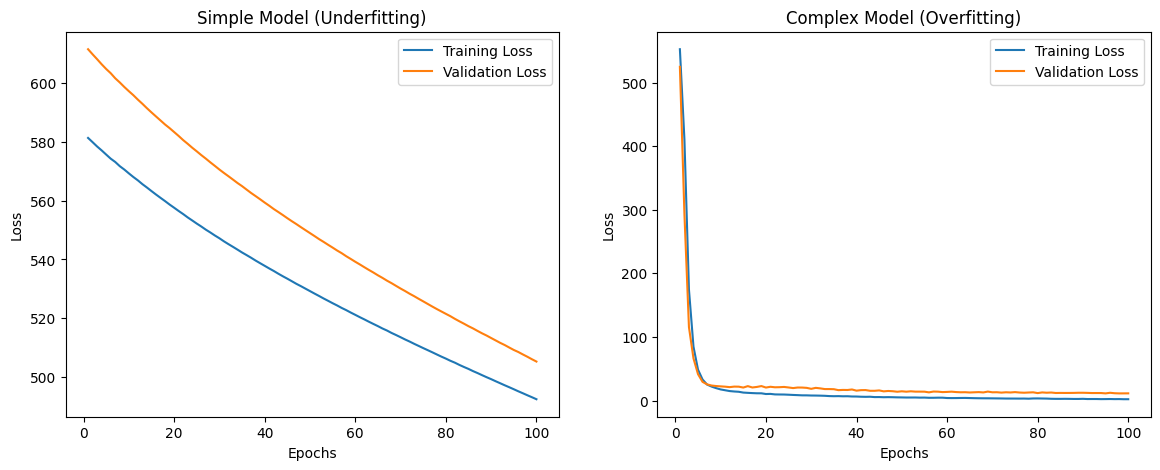

4/4 - 0s - 24ms/step - loss: 505.3508 - mae: 21.4699
4/4 - 0s - 12ms/step - loss: 11.3083 - mae: 2.3141
Simple model test MAE: 21.469884872436523
Complex model test MAE: 2.3140790462493896


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load and prepare the Boston Housing dataset
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Build a simple model (underfitting)
simple_model = models.Sequential([
    layers.Input(shape=(train_data.shape[1],)),
    layers.Dense(1)
])
simple_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the simple model
simple_history = simple_model.fit(train_data, train_targets, epochs=100, validation_data=(test_data, test_targets), verbose=0)

# Build a complex model (overfitting)
complex_model = models.Sequential([
    layers.Input(shape=(train_data.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
complex_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the complex model
complex_history = complex_model.fit(train_data, train_targets, epochs=100, validation_data=(test_data, test_targets), verbose=0)

# Plot training and validation loss for both models
epochs = range(1, 101)
plt.figure(figsize=(14, 5))

# Plot for the simple model
plt.subplot(1, 2, 1)
plt.plot(epochs, simple_history.history['loss'], label='Training Loss')
plt.plot(epochs, simple_history.history['val_loss'], label='Validation Loss')
plt.title('Simple Model (Underfitting)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot for the complex model
plt.subplot(1, 2, 2)
plt.plot(epochs, complex_history.history['loss'], label='Training Loss')
plt.plot(epochs, complex_history.history['val_loss'], label='Validation Loss')
plt.title('Complex Model (Overfitting)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the models
simple_test_loss, simple_test_mae = simple_model.evaluate(test_data, test_targets, verbose=2)
complex_test_loss, complex_test_mae = complex_model.evaluate(test_data, test_targets, verbose=2)

print(f"Simple model test MAE: {simple_test_mae}")
print(f"Complex model test MAE: {complex_test_mae}")
